# Machine Learning TP 1 - Part 2: PCA 

## Packages

In [1]:
import matplotlib
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Random seed

In [2]:
#==============================#
# Please don't change the seed #
#==============================#
SEED = 42

# make the algorithm determinist
np.random.seed(SEED) 

### Q1

In [3]:
csv_data = pd.read_csv('villes.csv', sep=';')
X = csv_data.ix[:, 1:13].values
labels = csv_data.ix[:, 0].values
#print(csv_data)

In [4]:
# Scale data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
# Kmeans
kmeans_clustering = KMeans(n_clusters=3, random_state=42).fit(X)

In [6]:
# PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

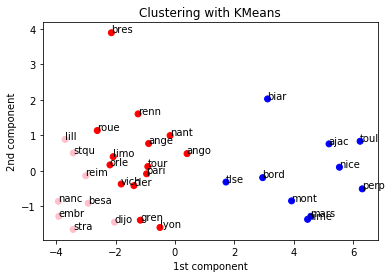

In [7]:
# Plot with kmeans
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Clustering with KMeans')
plt.show()

### Q2

In [8]:
# Agglomerative clustering
agglo_clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agglo_clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

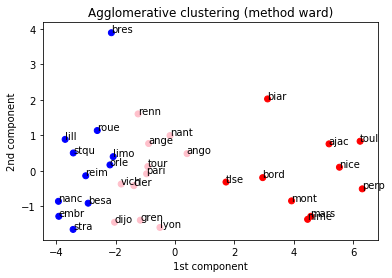

The clusters we get are almost the same than with the Kmeans algorithm, except the border on the lower-left part of the graph slightly towards the right


In [9]:
# Plot with agglomerative clustering (method ward)
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_clustering_ward.labels_, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Agglomerative clustering (method ward)')
plt.show()

print('The clusters we get are almost the same than with the Kmeans algorithm, except the border on the lower-left part of the graph slightly towards the right')

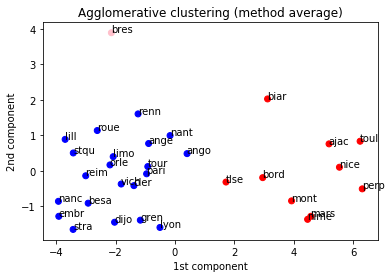

With average method, most of the cities are gathered in 2 clusters (except Brest that seems to be an outlier)


In [10]:
# Plot with agglomerative clustering (method average)
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_clustering_average.labels_, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Agglomerative clustering (method average)')
plt.show()

print('With average method, most of the cities are gathered in 2 clusters (except Brest that seems to be an outlier)')

In [11]:
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X) 
    print(silhouette_score(X, clustering, metric='euclidean')) 
print()    
print('We get the best silhouette score with 2 clusters.')

0.625557719180767
0.38809425947195864
0.39249385306689233
0.33538509681496237

We get the best silhouette score with 2 clusters.
